In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Basic data analysis
Exploratory data analysis: data cleaning if necessary, identifying min/max of each cycle, labeling cycles

## Load dataset
Uncomment line 2 and modify `n` for speed.

In [5]:
df = pd.read_csv('data/raw_cycles.csv')
#df = df.head(n=20000) # Uncomment this line to sample n rows for speed.
df.drop(0, inplace=True) # Drop units row
df = df.apply(pd.to_numeric, errors='coerce')

## Preview first `n` cycles
Plot data.

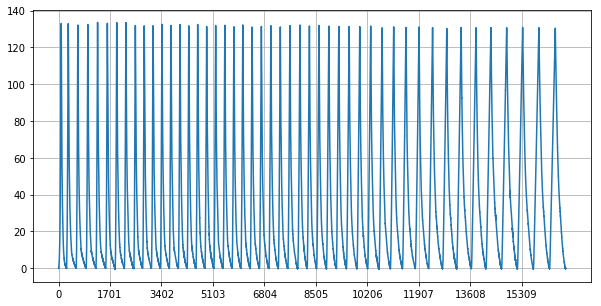

In [6]:
fig, ax = plt.subplots(figsize=(10,5));
ax.plot(df['Time'], df['Load']);
ax.grid(True);
ax.set_xticks(np.arange(0, df['Time'].max(), df.shape[0]/100));

In [7]:
fig.savefig('images/cycles_1.png');

## Identify extrema
Find local minima and maxima.

In [8]:
from scipy.signal import argrelextrema

In [9]:
minima = argrelextrema(df['Load'].values, comparator=np.less, order=100)[0]
maxima = argrelextrema(df['Load'].values, comparator=np.greater, order=100)[0]

## Label cycles in data
Cycles begin and end at each minimum.

In [10]:
col = np.zeros(shape=(len(df),), dtype=int)
for i in range(1, len(minima)):
    col[minima[i-1]:minima[i]] = i
df = df.assign(Cycle=pd.Series(col, index=df.index))

We show unique cycles in the data:

In [11]:
from matplotlib import cm

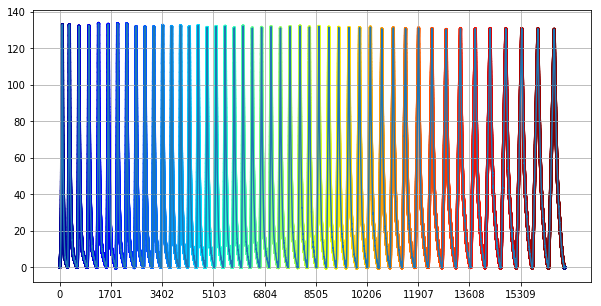

In [12]:
ax.scatter(df['Time'], df['Load'], s=5, c=df['Cycle'], cmap=cm.jet)
fig

In [13]:
fig.savefig('images/cycles_2.png');

## Update data and file with labels

In [14]:
df.to_csv('data/cycles.csv', index=False)

In [15]:
df[df['Cycle'] == 1];

# Statistical analysis
area, moment of area, curve belly, slope of upward response, etc.


In [16]:
#for cycle in range(df['Cycle'].max()):
#    np.trapz(df.values)

areas = []
for i in range(df['Cycle'].max()):
    cycle = df[df['Cycle'] == i].drop('Cycle', axis=1).values
    print(np.trapz(cycle))
#f = lambda cycle:  
#areas = np.fromiter((f(cycle) for cycle in), dtype=float)
#np.trapz(df.values, axis=0)

[3.36450000e-02 3.65400000e-02 7.72650000e-02 1.03105000e-01
 1.51760000e-01 2.10315000e-01 2.49160000e-01 2.94085000e-01
 3.49165000e-01 3.96720000e-01 4.39460000e-01 4.81885000e-01
 5.38420000e-01 5.74525000e-01 6.11475000e-01 6.72505000e-01
 7.27480000e-01 7.66030000e-01 8.38113134e+03 8.38119296e+03
 8.38123443e+03 8.38130483e+03 8.38134405e+03 8.38138450e+03
 8.38144741e+03 8.38149057e+03 8.38153620e+03 8.38158812e+03
 8.38165767e+03 8.38170860e+03 8.38173997e+03 8.38179912e+03
 8.38185105e+03 8.38189608e+03 8.38194518e+03 8.38200994e+03
 8.38206297e+03 8.38209784e+03 8.38215749e+03 8.38220943e+03
 8.38225507e+03 8.38230551e+03 8.38235606e+03 8.38242594e+03
 8.38246918e+03 8.38251943e+03 8.38258000e+03 8.38261082e+03
 8.38266675e+03 8.38271580e+03 8.38278232e+03 8.38283650e+03
 8.38288537e+03 8.38293164e+03 8.38299003e+03 8.38302912e+03
 8.38308474e+03 8.38314954e+03 8.38320422e+03 8.38324503e+03
 8.38329937e+03 8.38336600e+03 8.38339518e+03 8.38344289e+03
 8.38351737e+03 8.383571